In [9]:
import sys
sys.path.append('..')

from utils.common import read_beacon_coords, read_beacon_data, process_beacon_data_for_strongthree, process_beacon_data_for_pos
import argparse
import pandas as pd

args = argparse.Namespace(beacon_coords_file='../data0822a/beacon_coords.txt', beacon_data_file='../data0822a/bluetoothData_1.2m.txt', update_frequency=10)

actual_coords = read_beacon_coords(args.beacon_coords_file)
beacon_data = read_beacon_data(args.beacon_data_file)
print("beacon_data", beacon_data)
print(type(beacon_data))


# actual_coords_df = pd.DataFrame(actual_coords)

# # Convert beacon_data to a DataFrame
# beacon_data_df = pd.DataFrame(beacon_data)

# print("Actual Coordinates DataFrame:")
# print(actual_coords_df)
# print(actual_coords_df.dtypes)

# print("\nBeacon Data DataFrame:")
# print(beacon_data_df)
# print(beacon_data_df.dtypes)


beacon_data [[{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -60, 'accuracy': 9.027046541095386, 'time': 1724291044501}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -60, 'accuracy': 9.027046541095386, 'time': 1724291044597}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -60, 'accuracy': 9.027046541095386, 'time': 1724291044698}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -67, 'accuracy': 25.958067100628753, 'time': 1724291044799}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -67, 'accuracy': 25.958067100628753, 'time': 1724291044897}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -59, 'accuracy': 7.721894863531677, 'time': 1724291044996}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -59, 'accuracy': 7.721894863531677, 'time': 1724291045096}], [{'uuid': '88400000-0000-0000-0000-000000000000', 'rssi': -59, 'accuracy': 7.721894863531677, 'time': 1724291045198}], [{'uuid': '88400000-0000-0000-000

Interval between data 0 and 1: 0.10 seconds
Interval between data 1 and 2: 0.10 seconds
Interval between data 2 and 3: 0.10 seconds
Interval between data 3 and 4: 0.10 seconds
Interval between data 4 and 5: 0.10 seconds
Interval between data 5 and 6: 0.10 seconds
Interval between data 6 and 7: 0.10 seconds
Interval between data 7 and 8: 0.10 seconds
Interval between data 8 and 9: 0.10 seconds
Interval between data 9 and 10: 0.10 seconds
Interval between data 10 and 11: 0.10 seconds
Interval between data 11 and 12: 0.10 seconds
Interval between data 12 and 13: 0.10 seconds
Interval between data 13 and 14: 0.10 seconds
Interval between data 14 and 15: 0.10 seconds
Interval between data 15 and 16: 0.10 seconds
Interval between data 16 and 17: 0.11 seconds
Interval between data 17 and 18: 0.09 seconds
Interval between data 18 and 19: 0.10 seconds
Interval between data 19 and 20: 0.10 seconds
Interval between data 20 and 21: 0.10 seconds
Interval between data 21 and 22: 0.10 seconds
Interva

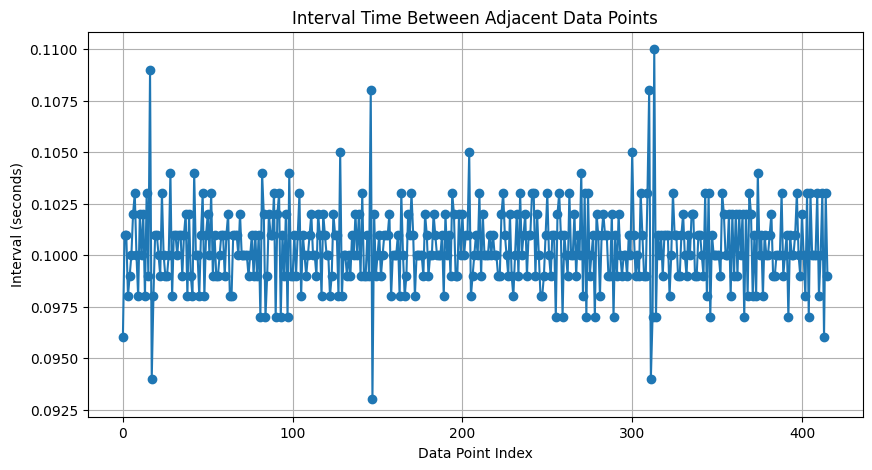

Average interval: 0.10 seconds
Minimum interval: 0.09 seconds
Maximum interval: 0.11 seconds


In [10]:
import matplotlib.pyplot as plt

intervals = []
for i in range(len(beacon_data) - 1):
    current_time = beacon_data[i][0]['time']
    next_time = beacon_data[i+1][0]['time']
    interval = (next_time - current_time) / 1000  # Convert milliseconds to seconds
    intervals.append(interval)
    print(f"Interval between data {i} and {i+1}: {interval:.2f} seconds")

plt.figure(figsize=(10, 5))
plt.plot(range(len(intervals)), intervals, marker='o')
plt.title('Interval Time Between Adjacent Data Points')
plt.xlabel('Data Point Index')
plt.ylabel('Interval (seconds)')
plt.grid(True)
plt.show()

print(f"Average interval: {sum(intervals) / len(intervals):.2f} seconds")
print(f"Minimum interval: {min(intervals):.2f} seconds")
print(f"Maximum interval: {max(intervals):.2f} seconds")

In [11]:
# Print RSSI values between adjacent lists in beacon_data
import matplotlib.pyplot as plt

import os
import glob

# Get all bluetooth data files
data_files = sorted(glob.glob('../data0822a/bluetoothData*.txt'))

for file_path in data_files:
    # Read beacon data from the current file
    beacon_data = read_beacon_data(file_path)
    
    # Create a dictionary to store RSSI values for each UUID
    uuid_rssi_data = {}

    # Collect RSSI data for each UUID
    for data_list in beacon_data:
        for beacon in data_list:
            uuid = beacon['uuid']
            rssi = beacon['rssi']
            time = beacon['time'] / 1000  # Convert milliseconds to seconds
            
            if uuid not in uuid_rssi_data:
                uuid_rssi_data[uuid] = {'time': [], 'rssi': []}
            
            uuid_rssi_data[uuid]['time'].append(time)
            uuid_rssi_data[uuid]['rssi'].append(rssi)

    # Plot RSSI changes for each UUID
    # plt.figure(figsize=(12, 12))

    # Sort UUIDs to ensure consistent order
    sorted_uuids = sorted(uuid_rssi_data.keys())

    for uuid in sorted_uuids:
        data = uuid_rssi_data[uuid]
        # plt.plot(data['time'], data['rssi'], label=f'UUID: {uuid}')

    # plt.title(f'RSSI Changes Over Time for Different UUIDs - {os.path.basename(file_path)}')
    # plt.xlabel('Time (seconds)')
    # plt.ylabel('RSSI (dBm)')
    # plt.legend()
    # plt.grid(True)
    
    # # Set y-axis limits with more detailed scale
    # plt.ylim(-100, -30)  # Typical RSSI range for Bluetooth
    # plt.yticks(range(-100, -29, 2))  # Create ticks every 5 dBm
    
    # plt.show()

    # Print summary statistics
    print(f"File: {os.path.basename(file_path)}")
    for uuid in sorted_uuids:
        data = uuid_rssi_data[uuid]
        print(f"UUID: {uuid}")
        print(f"  Number of data points: {len(data['rssi'])}")
        print(f"  Min RSSI: {min(data['rssi'])}")
        print(f"  Max RSSI: {max(data['rssi'])}")
        print(f"  Average RSSI: {sum(data['rssi']) / len(data['rssi']):.2f}")
        print()
    print("\n" + "="*50 + "\n")


File: bluetoothData_1.0m.txt
UUID: 88400000-0000-0000-0000-000000000000
  Number of data points: 688
  Min RSSI: -78
  Max RSSI: -60
  Average RSSI: -68.13



File: bluetoothData_1.2m.txt
UUID: 88400000-0000-0000-0000-000000000000
  Number of data points: 417
  Min RSSI: -75
  Max RSSI: 127
  Average RSSI: -63.95



File: bluetoothData_1.4m.txt
UUID: 88400000-0000-0000-0000-000000000000
  Number of data points: 412
  Min RSSI: -88
  Max RSSI: 127
  Average RSSI: -69.38



File: bluetoothData_1.6m.txt
UUID: 88400000-0000-0000-0000-000000000000
  Number of data points: 422
  Min RSSI: -85
  Max RSSI: -63
  Average RSSI: -68.50



File: bluetoothData_1.8m.txt
UUID: 88400000-0000-0000-0000-000000000000
  Number of data points: 355
  Min RSSI: -75
  Max RSSI: -64
  Average RSSI: -69.46



File: bluetoothData_2.0m.txt
UUID: 88400000-0000-0000-0000-000000000000
  Number of data points: 375
  Min RSSI: -81
  Max RSSI: 127
  Average RSSI: -71.09



File: bluetoothData_2.2m.txt
UUID: 88400000-00

In [12]:
import numpy as np
from scipy.signal import medfilt
from filterpy.kalman import KalmanFilter

def apply_average_filter(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def apply_median_filter(data, window_size=9):
    return medfilt(data, kernel_size=window_size)

def apply_kalman_filter(data):
    kf = KalmanFilter(dim_x=1, dim_z=1)
    kf.x = np.array([data[0]])
    kf.P *= 1000.
    kf.R = 5
    kf.Q = 0.1
    kf.H = np.array([[1.]])
    kf.F = np.array([[1.]])
    
    filtered_data = []
    for measurement in data:
        kf.predict()
        kf.update(measurement)
        filtered_data.append(kf.x[0])
    return filtered_data

# Dictionary to store filename to Kalman mean RSSI mapping
filename_to_median_mean_rssi = {}

# Apply filters and calculate mean signal strength for each UUID
for file_path in data_files:
    beacon_data = read_beacon_data(file_path)
    
    # Create a dictionary to store RSSI values for each UUID
    uuid_rssi_data = {}

    # Collect RSSI data for each UUID
    for data_list in beacon_data:
        for beacon in data_list:
            uuid = beacon['uuid']
            rssi = beacon['rssi']
            time = beacon['time'] / 1000  # Convert milliseconds to seconds
            
            if uuid not in uuid_rssi_data:
                uuid_rssi_data[uuid] = {'time': [], 'rssi': []}
            
            uuid_rssi_data[uuid]['time'].append(time)
            uuid_rssi_data[uuid]['rssi'].append(rssi)

    # Plot original and filtered RSSI changes for each UUID
    # plt.figure(figsize=(15, 10))

    # Sort UUIDs to ensure consistent order
    sorted_uuids = sorted(uuid_rssi_data.keys())

    kalman_mean_rssi_list = []

    for i, uuid in enumerate(sorted_uuids):
        data = uuid_rssi_data[uuid]
        time = np.array(data['time'])
        rssi = np.array(data['rssi'])
        
        avg_filtered = apply_average_filter(rssi)
        median_filtered = apply_median_filter(rssi)
        kalman_filtered = apply_kalman_filter(rssi)
        
        # plt.subplot(len(sorted_uuids), 1, i+1)
        # plt.plot(time, rssi, label='Original', alpha=0.5)
        # plt.plot(time[2:-2], avg_filtered, label='Average Filter')
        # plt.plot(time[2:-2], median_filtered[2:-2], label='Median Filter')
        # plt.plot(time, kalman_filtered, label='Kalman Filter')
        
        # plt.xlabel('Time (seconds)')
        # plt.ylabel('RSSI')
        # plt.ylim(-100, -30)
        # plt.yticks(range(-100, -29, 2))
        # plt.legend()
        # plt.grid(True)
        # plt.title(f'UUID: {uuid}')  # Add UUID to the subplot title

        kalman_mean_rssi_list.append(np.mean(kalman_filtered))

    # plt.tight_layout()
    # plt.suptitle(f'RSSI Changes Over Time with Filters - {os.path.basename(file_path)}', fontsize=16)
    # plt.subplots_adjust(top=0.93)
    # plt.show()

    # Store the mean Kalman filtered RSSI for this file
    filename_to_median_mean_rssi[os.path.basename(file_path)] = np.mean(median_filtered)

    # Print summary statistics
    print(f"File: {os.path.basename(file_path)}")
    for uuid in sorted_uuids:
        data = uuid_rssi_data[uuid]
        original_rssi = np.array(data['rssi'])
        avg_filtered = apply_average_filter(original_rssi)
        median_filtered = apply_median_filter(original_rssi)
        kalman_filtered = apply_kalman_filter(original_rssi)
        
        print(f"UUID: {uuid}")
        print(f"  Original mean RSSI: {np.mean(original_rssi):.2f}")
        print(f"  Average filter mean RSSI: {np.mean(avg_filtered):.2f}")
        print(f"  Median filter mean RSSI: {np.mean(median_filtered):.2f}")
        print(f"  Kalman filter mean RSSI: {np.mean(kalman_filtered):.2f}")
        print()
    print("\n" + "="*50 + "\n")

# Print the filename to Kalman mean RSSI mapping
print("Filename to Kalman Mean RSSI Mapping:")
for filename, mean_rssi in filename_to_median_mean_rssi.items():
    print(f"{filename}: {mean_rssi:.2f}")


File: bluetoothData_1.0m.txt
UUID: 88400000-0000-0000-0000-000000000000
  Original mean RSSI: -68.13
  Average filter mean RSSI: -68.13
  Median filter mean RSSI: -68.54
  Kalman filter mean RSSI: -68.12



File: bluetoothData_1.2m.txt
UUID: 88400000-0000-0000-0000-000000000000
  Original mean RSSI: -63.95
  Average filter mean RSSI: -63.92
  Median filter mean RSSI: -65.90
  Kalman filter mean RSSI: -63.83



File: bluetoothData_1.4m.txt
UUID: 88400000-0000-0000-0000-000000000000
  Original mean RSSI: -69.38
  Average filter mean RSSI: -70.08
  Median filter mean RSSI: -71.23
  Kalman filter mean RSSI: -70.13



File: bluetoothData_1.6m.txt
UUID: 88400000-0000-0000-0000-000000000000
  Original mean RSSI: -68.50
  Average filter mean RSSI: -68.52
  Median filter mean RSSI: -66.95
  Kalman filter mean RSSI: -68.52



File: bluetoothData_1.8m.txt
UUID: 88400000-0000-0000-0000-000000000000
  Original mean RSSI: -69.46
  Average filter mean RSSI: -69.45
  Median filter mean RSSI: -69.97
  

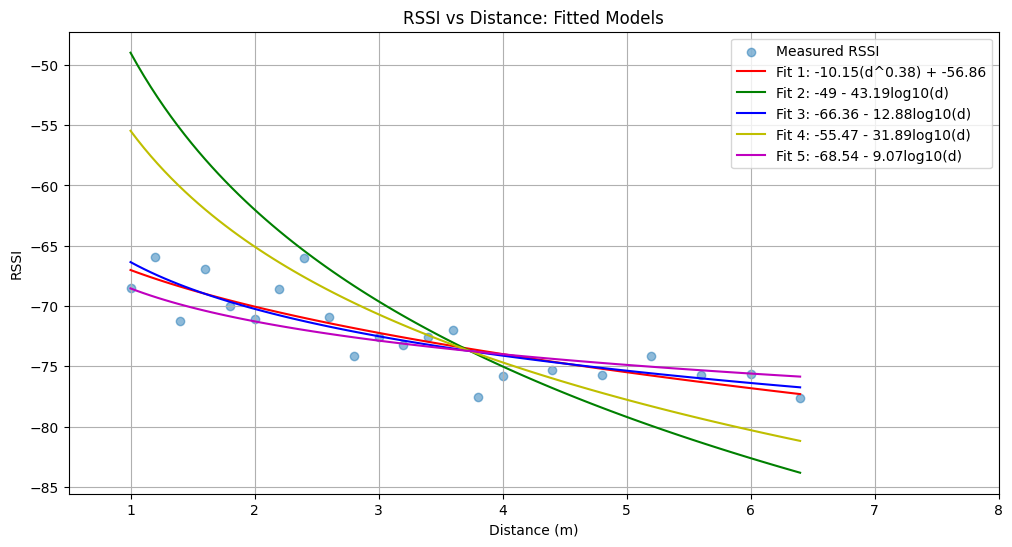

Equation 1 parameters: A=-10.15, B=0.38, C=-56.86
Equation 2 parameters: n=43.19
Equation 3 parameters: txPower=-66.36, n=12.88
Equation 4 parameters: n=31.89
Equation 5 parameters: n=9.07


In [13]:
import numpy as np
from scipy.optimize import curve_fit
import re
import matplotlib.pyplot as plt

def equation1(distance, A, B, C):
    return A * (distance ** B) + C

def equation2(distance, n):
    return -49 - 10 * n * np.log10(distance)

def equation3(distance, txPower, n):
    return txPower - 10 * n * np.log10(distance)

def equation4(distance, n):
    return -55.47 - 10 * n * np.log10(distance)

def equation5(distance, n):
    return -68.54 - 10 * n * np.log10(distance)

# Extract distances and RSSI values from filename_to_median_mean_rssi
distances = []
rssi_values = []

for i, (filename, rssi) in enumerate(filename_to_median_mean_rssi.items()):
    match = re.search(r'(\d+(?:\.\d+)?)m', filename)
    if match:
        distance = float(match.group(1))
        distances.append(distance)
        rssi_values.append(rssi)

# Convert to numpy arrays
distances = np.array(distances)
rssi_values = np.array(rssi_values)

# Fit the equations
popt1, _ = curve_fit(equation1, distances, rssi_values)
A, B, C = popt1

popt2, _ = curve_fit(equation2, distances, rssi_values)
n2 = popt2[0]

popt3, _ = curve_fit(equation3, distances, rssi_values)
txPower, n3 = popt3

popt4, _ = curve_fit(equation4, distances, rssi_values)
n4 = popt4[0]

popt5, _ = curve_fit(equation5, distances, rssi_values)
n5 = popt5[0]

# Generate points for plotting
plot_distances = np.linspace(min(distances), max(distances), 100)

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(distances, rssi_values, label='Measured RSSI', alpha=0.5)
plt.plot(plot_distances, equation1(plot_distances, A, B, C), 'r-', label=f'Fit 1: {A:.2f}(d^{B:.2f}) + {C:.2f}')
plt.plot(plot_distances, equation2(plot_distances, n2), 'g-', label=f'Fit 2: -49 - {10*n2:.2f}log10(d)')
plt.plot(plot_distances, equation3(plot_distances, txPower, n3), 'b-', label=f'Fit 3: {txPower:.2f} - {10*n3:.2f}log10(d)')
plt.plot(plot_distances, equation4(plot_distances, n4), 'y-', label=f'Fit 4: -55.47 - {10*n4:.2f}log10(d)')
plt.plot(plot_distances, equation5(plot_distances, n5), 'm-', label=f'Fit 5: -68.54 - {10*n5:.2f}log10(d)')
plt.xlabel('Distance (m)')
plt.xlim(0.5, 8)  # Set x-axis limits from 1 to 8 meters
plt.ylabel('RSSI')
plt.title('RSSI vs Distance: Fitted Models')
plt.legend()
plt.grid(True)
plt.show()

print(f"Equation 1 parameters: A={A:.2f}, B={B:.2f}, C={C:.2f}")
print(f"Equation 2 parameters: n={10*n2:.2f}")
print(f"Equation 3 parameters: txPower={txPower:.2f}, n={10*n3:.2f}")
print(f"Equation 4 parameters: n={10*n4:.2f}")
print(f"Equation 5 parameters: n={10*n5:.2f}")

# compute the measure error between 0821 data and 0822 data

In [18]:
# 0821 data
filename_to_median_mean_rssi_0821 = {
    "bluetoothData_1.2m.txt" : -68.80,
    "bluetoothData_1.6m.txt" : -67.87,
    "bluetoothData_2.0m.txt" : -72.01,
    "bluetoothData_2.4m.txt" : -65.18,
    "bluetoothData_2.8m.txt" : -67.46,
    "bluetoothData_3.2m.txt" : -75.18,
    "bluetoothData_3.6m.txt" : -80.28,
    "bluetoothData_4.0m.txt" : -71.12,
    "bluetoothData_4.4m.txt" : -76.97,
    "bluetoothData_4.8m.txt" : -78.72,
    "bluetoothData_5.2m.txt" : -76.85,
    "bluetoothData_5.6m.txt" : -82.10,
    "bluetoothData_6.0m.txt" : -80.15,
    "bluetoothData_6.4m.txt" : -79.07,
    "bluetoothData_6.8m.txt" : -80.86,
    "bluetoothData_7.2m.txt" : -80.35,
    "bluetoothData_7.6m.txt" : -79.48,
    "bluetoothData_8.0m.txt" : -80.59,
}
distance_to_median_mean_rssi_0821 = {}

for i, (filename, rssi) in enumerate(filename_to_median_mean_rssi_0821.items()):
    match = re.search(r'(\d+(?:\.\d+)?)m', filename)
    if match:
        distance = float(match.group(1))
        distance_to_median_mean_rssi_0821[distance] = rssi
        
distance_to_median_mean_rssi = {}
for i, (filename, rssi) in enumerate(filename_to_median_mean_rssi.items()):
    match = re.search(r'(\d+(?:\.\d+)?)m', filename)
    if match:
        distance = float(match.group(1))
        distance_to_median_mean_rssi[distance] = rssi

for distance, rssi in distance_to_median_mean_rssi_0821.items():
    if distance not in distance_to_median_mean_rssi:
        print(f"Distance: {distance}m, 0821 RSSI: {rssi:.2f}, 0822 RSSI: N/A, Error: N/A")
        continue
    error = abs(rssi - distance_to_median_mean_rssi[distance])
    print(f"Distance: {distance}m, 0821 RSSI: {rssi:.2f}, 0822 RSSI: {distance_to_median_mean_rssi[distance]:.2f}, Error: {error:.2f}")

Distance: 1.2m, 0821 RSSI: -68.80, 0822 RSSI: -65.90, Error: 2.90
Distance: 1.6m, 0821 RSSI: -67.87, 0822 RSSI: -66.95, Error: 0.92
Distance: 2.0m, 0821 RSSI: -72.01, 0822 RSSI: -71.11, Error: 0.90
Distance: 2.4m, 0821 RSSI: -65.18, 0822 RSSI: -66.05, Error: 0.87
Distance: 2.8m, 0821 RSSI: -67.46, 0822 RSSI: -74.11, Error: 6.65
Distance: 3.2m, 0821 RSSI: -75.18, 0822 RSSI: -73.21, Error: 1.97
Distance: 3.6m, 0821 RSSI: -80.28, 0822 RSSI: -72.01, Error: 8.27
Distance: 4.0m, 0821 RSSI: -71.12, 0822 RSSI: -75.78, Error: 4.66
Distance: 4.4m, 0821 RSSI: -76.97, 0822 RSSI: -75.34, Error: 1.63
Distance: 4.8m, 0821 RSSI: -78.72, 0822 RSSI: -75.75, Error: 2.97
Distance: 5.2m, 0821 RSSI: -76.85, 0822 RSSI: -74.11, Error: 2.74
Distance: 5.6m, 0821 RSSI: -82.10, 0822 RSSI: -75.73, Error: 6.37
Distance: 6.0m, 0821 RSSI: -80.15, 0822 RSSI: -75.60, Error: 4.55
Distance: 6.4m, 0821 RSSI: -79.07, 0822 RSSI: -77.63, Error: 1.44
Distance: 6.8m, 0821 RSSI: -80.86, 0822 RSSI: N/A, Error: N/A
Distance: 7.2m

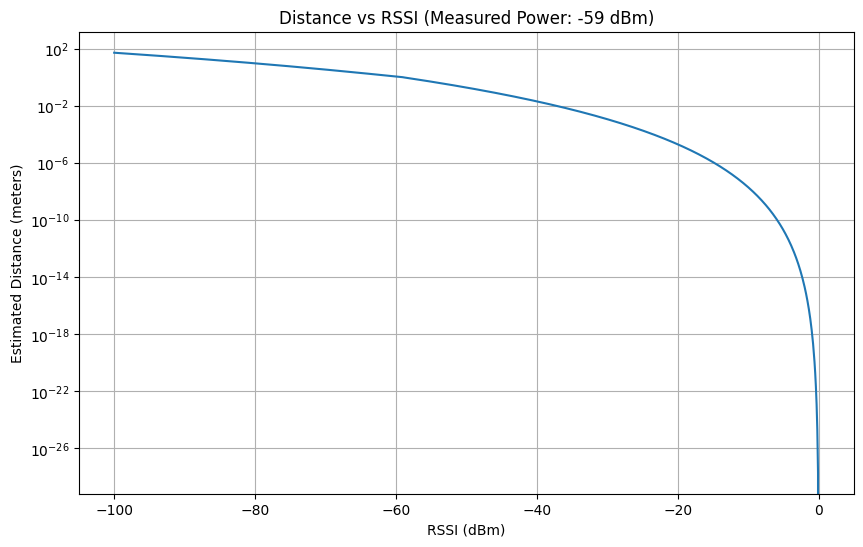

In [14]:

import numpy as np
import matplotlib.pyplot as plt

def calculate_distance(measured_power, rssi):
    if rssi == 0:
        return -1.0  # if we cannot determine distance, return -1.
    
    ratio = rssi / measured_power
    if ratio < 1.0:
        return ratio ** 10
    else:
        distance = 0.89976 * (ratio ** 7.7095) + 0.111
        return distance

# Function to draw the curve
def draw_distance_curve(measured_power):
    rssi_values = np.linspace(-100, 0, 1000)  # RSSI range from -100 to 0
    distances = [calculate_distance(measured_power, rssi) for rssi in rssi_values]
    
    plt.figure(figsize=(10, 6))
    plt.plot(rssi_values, distances)
    plt.title(f'Distance vs RSSI (Measured Power: {measured_power} dBm)')
    plt.xlabel('RSSI (dBm)')
    plt.ylabel('Estimated Distance (meters)')
    plt.grid(True)
    plt.yscale('log')  # Use log scale for y-axis due to exponential nature
    plt.show()

# Example usage
measured_power = -59  # Example value, adjust as needed
draw_distance_curve(measured_power)



In [15]:
def get_acc_strongest_beacons(beacon_data, beacon_coords):
    strongest_uuids, signal_strengths = process_beacon_data(beacon_data)
    return [beacon_coords[uuid] for uuid in strongest_uuids]

def rssi_to_distance(rssi):
    txPower = -59
    n = 2.0
    return 10 ** ((txPower - rssi) / (10 * n))

In [16]:
# Plot the dynamic positions

plt.figure(figsize=(10, 6))

plt.scatter(actual_coords['x'], actual_coords['y'], c='green', label='Actual Coordinates')
plt.scatter(estimated_coords['x'], estimated_coords['y'], c='red', label='Estimated Coordinates')

plt.title('Estimated vs Actual Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

KeyError: 'x'

<Figure size 1000x600 with 0 Axes>